In [1]:
import colour_scheme as cs

import importlib
importlib.reload(cs)
import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm


viridis = cm.get_cmap('YlGnBu', 256)
newcolors = viridis(np.linspace(0, 1, 256))

pink = np.array([211/256, 211/256, 211/256, 1])

newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

from pathlib import Path
path_data = ''

# Percent neuron d9

In [4]:
d9 = pd.read_csv(Path(path_data)/"mistr_d9_meta.tsv", sep='\t')
d9['Condition_batch'] = d9['Condition'].astype(str) + '_' + d9['orig.ident'].astype(str) 
d9.head()

,orig.ident,nCount_RNA,nFeature_RNA,cell_line,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,...,RNA_snn_res.0.75,seurat_clusters,timepoint,RNA_snn_res.1,RNA_snn_res.0.8,RNA_snn_res.0.5,batch,Condition,seurat_cluster_annotation,Condition_batch
splitMR_AAACCCACACAGCCTG,splitMiSTR,9943,4106,H9,286,7,HTO2,unmapped,0.799077,HTO2,...,6,3,9d,3,2,3,splitMiSTR,B,Hypothalamic Progenitors,B_splitMiSTR
splitMR_AAACCCAGTAACTGCT,splitMiSTR,8996,3988,H9,252,7,HTO2,unmapped,1.172203,HTO2,...,3,3,9d,3,2,3,splitMiSTR,B,Hypothalamic Progenitors,B_splitMiSTR
splitMR_AAACCCAGTAGGAAAG,splitMiSTR,6987,3397,H9,216,7,HTO5,unmapped,1.387183,HTO5,...,3,3,9d,3,2,3,splitMiSTR,E,Hypothalamic Progenitors,E_splitMiSTR
splitMR_AAACCCAGTTATCTTC,splitMiSTR,8691,3679,H9,378,7,HTO6,unmapped,1.711595,HTO6,...,0,2,9d,0,1,2,splitMiSTR,Control,Cortical-PSB-LGE Progenitors,Control_splitMiSTR
splitMR_AAACCCATCGATTGGT,splitMiSTR,7553,3516,H9,557,7,HTO5,unmapped,2.021712,HTO5,...,3,3,9d,3,2,3,splitMiSTR,E,Hypothalamic Progenitors,E_splitMiSTR


In [5]:
d9.seurat_cluster_annotation.unique()

array(['Hypothalamic Progenitors', 'Cortical-PSB-LGE Progenitors',
       'Floor Plate', 'Ventral Neuroepithelium', 'Ventral Neuroblasts',
       'Hypothalamic Neurons', 'Ventral Tele-, Diencephalon Progenitors',
       'Undetermined'], dtype=object)

In [7]:
simple_cell = {'Hypothalamic Progenitors':'NPC', 'Cortical-PSB-LGE Progenitors':'NPC',
       'Floor Plate':'NPC', 'Ventral Neuroepithelium':'NPC', 'Ventral Neuroblasts':'Neuron',
       'Hypothalamic Neurons':'Neuron', 'Ventral Tele-, Diencephalon Progenitors':'NPC',
       'Undetermined':'off'}


d9['simple_cells'] = d9['seurat_cluster_annotation'].map(simple_cell)
dfc = pd.crosstab(d9['Condition_batch'], d9['simple_cells'], normalize='index').mul(100).round(100)
dfc['Condition_batch'] = dfc.index.copy()

dfc = pd.melt(dfc,id_vars = ['Condition_batch'], value_vars = ['NPC', 'Neuron', 'off'])
dfc['batch'] = dfc['Condition_batch'].str.split('_').str[1]
dfc[['simple_cells', 'batch']].value_counts()



simple_cells  batch     
NPC           splitMiSTR    6
Neuron        splitMiSTR    6
off           splitMiSTR    6
NPC           MiSTR         5
Neuron        MiSTR         5
off           MiSTR         5
Name: count, dtype: int64

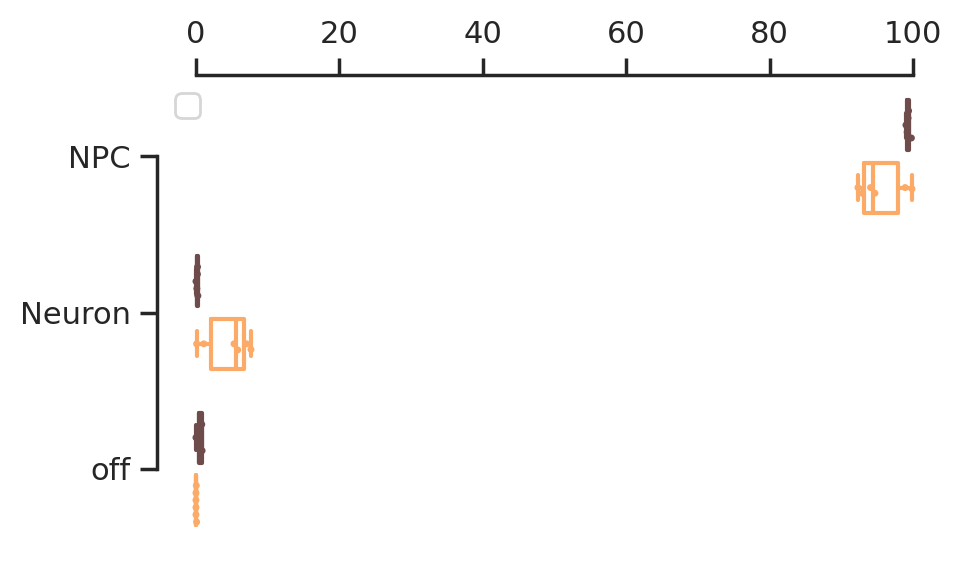

In [64]:
sns.set(rc={'figure.figsize':(5,3)})

sns.set_style("white")
sns.set_style('ticks')


cols_orig = {'splitMiSTR':'#FCAA67', 'MiSTR':'#6F4C4C'}

sns.boxplot(data=dfc, y="simple_cells", x="value", hue="batch", 
              palette = cols_orig, fill=False, showfliers = False, dodge=True, gap=.2)


sns.swarmplot(data=dfc, y="simple_cells", x="value", hue="batch", palette = cols_orig,s=2.5, dodge=True)
sns.despine(offset=1, trim=True, bottom=True, top=False)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

plt.legend('')


plt.xlabel('')
plt.ylabel('')

plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42 
plt.savefig('Neurons_d9_dots.pdf', dpi=300)

plt.show()

# d21

In [82]:
d9 = pd.read_csv(Path(path_data)/"mistr_d21_meta.tsv", sep='\t')
d9 = d9[~d9['Condition'].isin(['Doublet', 'Negative'])]
d9['Condition_batch'] = d9['Condition'].astype(str) + '_' + d9['orig.ident'].astype(str) 
d9.head()
d9.Condition.unique()

array(['B', 'C', 'D', 'Control', 'E', 'A'], dtype=object)

In [83]:
d9.seurat_cluster_annotation.unique()

array(['Floorplate (Midbrain)', 'Cycling Telencephalic Progenitors (G2M)',
       'MGE Progenitors', 'PoA / Caudal Hypothalamic Progenitors',
       'Cortical-PSB-LGE Progenitors', 'LGE-derived Interneurons',
       'Preoptic / Mediobasal Hypothalamic Progenitors',
       'MGE-derived Interneurons (GABA/ACh)', 'Hypothalamic Neurons',
       'Cycling Telencephalic Progenitors (S)',
       'MGE-derived Interneurons (ACh)', 'Off-Targets'], dtype=object)

In [84]:
simple_cell = {'Floorplate (Midbrain)':'NPC',
               'Preoptic / Mediobasal Hypothalamic Progenitors':'NPC',
               'Cortical-PSB-LGE Progenitors':'NPC',
               'Cycling Telencephalic Progenitors (G2M)':'NPC',
                'MGE Progenitors':'NPC',
               'PoA / Caudal Hypothalamic Progenitors':'NPC',
               'MGE-derived Interneurons (ACh)':'Neuron', 
                'Hypothalamic Neurons':'Neuron',
               'LGE-derived Interneurons':'Neuron', 
                'MGE-derived Interneurons (GABA/ACh)':'Neuron',
               'Cycling Telencephalic Progenitors (S)':'NPC',
                       'Off-Targets':'off'}
    

d9['simple_cells'] = d9['seurat_cluster_annotation'].map(simple_cell)
dfc = pd.crosstab(d9['Condition_batch'], d9['simple_cells'], normalize='index').mul(100).round(100)
dfc['Condition_batch'] = dfc.index.copy()

dfc = pd.melt(dfc,id_vars = ['Condition_batch'], value_vars = ['NPC', 'Neuron', 'off'])
dfc['batch'] = dfc['Condition_batch'].str.split('_').str[1]
dfc.head()

,Condition_batch,simple_cells,value,batch
0,A_MiSTR,NPC,57.462687,MiSTR
1,A_splitMiSTR,NPC,78.467909,splitMiSTR
2,B_MiSTR,NPC,71.503680,MiSTR
3,B_splitMiSTR,NPC,81.151832,splitMiSTR
4,C_MiSTR,NPC,82.673267,MiSTR


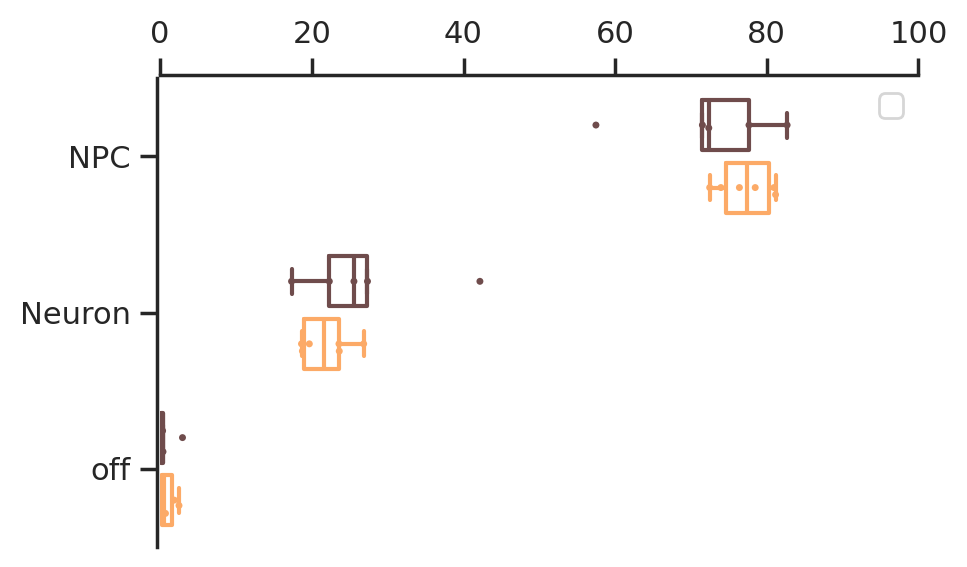

In [85]:
sns.set(rc={'figure.figsize':(5,3)})

sns.set_style("white")
sns.set_style('ticks')


cols_orig = {'splitMiSTR':'#FCAA67', 'MiSTR':'#6F4C4C'}

sns.boxplot(data=dfc, y="simple_cells", x="value", hue="batch", 
              palette = cols_orig, fill=False, showfliers = False, dodge=True, gap=.2)


sns.swarmplot(data=dfc, y="simple_cells", x="value", hue="batch", palette = cols_orig,s=2.5, dodge=True)
sns.despine(offset=1, trim=False, bottom=True, top=False)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlim((0,100))
plt.xticks([0, 20, 40, 60, 80,100])  

plt.legend('')


plt.xlabel('')
plt.ylabel('')

plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42 
plt.savefig('Neurons_d21_dots.pdf', dpi=300)

plt.show()